# Finding Exoplanets through various methods



## Start with loading basic packages

In [153]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
%matplotlib inline

df = pd.read_csv("/Users/Nik Hadri Mahmod/Documents/Search of Exoplanets/exoTrain.csv")
df.head(6)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
5,2,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16


In [154]:
# there are 5087 observations(rows) and 3198 features(columns)

# Solve the problem using Principle Component Analysis (PCA)

## Standardize the Data

In [155]:
# store Flux 1-3192 in a matrix
x = df.iloc[:, 1:]
features = x.columns.values
# the matrix represents 5087 observations or candidates and 3197 different fluxes over time excluding the label feature
x_train = x.values
x_train.shape

(5087, 3197)

In [156]:
# store Label in a matrix
y_train = df.loc[:,['LABEL']].values
# the matrix represents 5087 observations or candidates and 1 Label column that consists of Label 1 as confirmed non-exoplanet
# and Label 2 as confirmed exoplanet 
y_train.shape

(5087, 1)

In [157]:
x_train = StandardScaler().fit_transform(x)

In [158]:
pd.DataFrame(data = x_train, columns = features).head(6)

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,-0.002356,-0.002054,-0.005798,-0.008237,-0.008479,-0.011271,-0.010440,-0.009202,-0.009644,-0.015512,...,-0.014894,-0.016832,-0.017778,-0.014490,-0.012684,-0.010540,0.029934,0.034198,0.027368,0.018052
1,-0.008528,-0.007452,-0.009387,-0.008827,-0.010201,-0.009118,-0.008426,-0.008724,-0.009838,-0.011043,...,-0.012283,-0.014863,-0.016170,-0.015495,-0.013734,-0.012259,0.027075,0.031097,0.028039,0.022165
2,0.018049,0.018690,0.016731,0.015328,0.013010,0.013236,0.014403,0.016237,0.014920,0.017677,...,-0.014671,-0.013581,-0.015124,-0.015595,-0.014049,-0.012178,0.027069,0.029101,0.022752,0.014100
3,0.008464,0.010040,0.007084,0.006386,0.007001,0.006876,0.008513,0.008593,0.009016,0.009384,...,-0.011969,-0.014061,-0.015515,-0.014392,-0.013245,-0.012510,0.027239,0.029755,0.025989,0.021753
4,-0.058207,-0.056947,-0.057783,-0.056283,-0.052582,-0.049016,-0.046199,-0.049650,-0.052911,-0.057256,...,-0.032918,-0.025265,-0.024664,-0.022167,-0.022363,-0.020486,0.005329,0.009026,0.001748,-0.014525
5,0.003097,0.001606,0.001462,0.001425,0.001400,0.000878,0.003589,0.002801,0.002075,-0.000090,...,-0.015605,-0.013102,-0.014732,-0.014400,-0.013072,-0.011912,0.025270,0.028383,0.023804,0.019669


# PCA Projection to 2D

In [159]:
pca = PCA(n_components=2)

In [160]:
pca.n_components

2

In [161]:
pc = pca.fit_transform(x_train)

In [162]:
pdf = pd.DataFrame(data = pc, columns = ['Principal Component 1', 'Principal Component 2'])
pdf.head(6)

,Principal Component 1,Principal Component 2
0,-0.877626,-0.207684
1,-0.891087,-0.157275
2,-0.982439,0.078053
3,-0.919516,-0.135503
4,-1.385796,-0.309362
5,-0.758953,0.004432


In [163]:
#df = df.replace(1,'Non-Exoplanet')
#df = df.replace(2,'Exoplanet')
df[['LABEL']].head(6)

,LABEL
0,2
1,2
2,2
3,2
4,2
5,2


In [164]:
df_train = pd.concat([df[['LABEL']], pdf], axis = 1)
df_train.head(6)

,LABEL,Principal Component 1,Principal Component 2
0,2,-0.877626,-0.207684
1,2,-0.891087,-0.157275
2,2,-0.982439,0.078053
3,2,-0.919516,-0.135503
4,2,-1.385796,-0.309362
5,2,-0.758953,0.004432


## Visualize 2D Projection

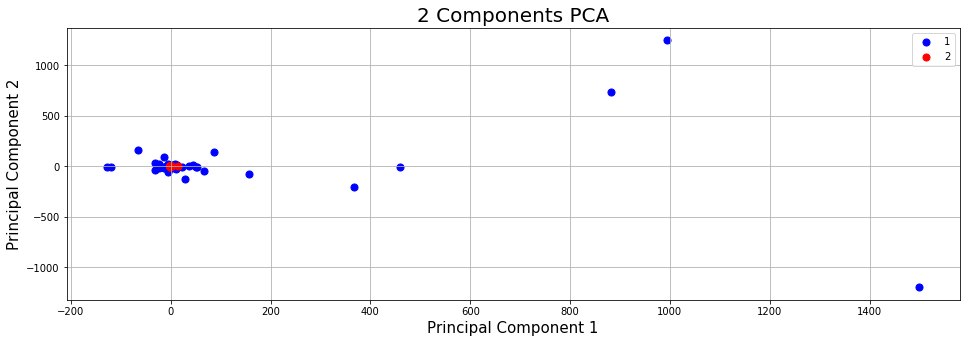

In [174]:
fig = plt.figure(figsize = (16,5))
ax = fig.add_subplot(1,1,1)

labels = [1,2]
colors = ['b', 'r']
for label, color in zip(labels,colors):
    indicesToKeep = df_train['LABEL'] == label
    ax.scatter(df_train.loc[indicesToKeep, 'Principal Component 1']
              , df_train.loc[indicesToKeep, 'Principal Component 2']
               ,label = label
              , c = color
              , s = 50)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Components PCA', fontsize = 20)
ax.legend(labels)
ax.grid()


In [166]:
var_ratio = pca.explained_variance_ratio_
var_ratio

array([0.27373539, 0.22536219])

In [167]:
var_percentage = (var_ratio[0] + var_ratio[1])*100
var_percentage

49.909757319562004

In [168]:
X = np.array([[1, -1, 2],
             [2,  0, 0],
             [0,1, -1 ]])
#X = np.transpose(X)
X = X.T
mms = preprocessing.MinMaxScaler()
print((mms.fit_transform(X)).T)


[[0.66666667 0.         1.        ]
 [1.         0.         0.        ]
 [0.5        1.         0.        ]]


C:\Users\Nik Hadri Mahmod\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [175]:
df_t = x.T

These two principle components only contain 49.91% of the information. The first and second principal contain 27.37% and 22.54% of the variance respectively. The rest is contained in the third and fourth principal component.

In [176]:
mms = preprocessing.MinMaxScaler()
df_t_norm = (mms.fit_transform(df_t)).T

In [177]:
pca = PCA(n_components=2)
pc_norm = pca.fit_transform(df_t_norm)
pc_norm

array([[ 2.01918254e+01, -5.98743077e-02],
       [ 1.45552479e+01,  2.36886366e-01],
       [ 4.81659950e+00, -1.28342131e+00],
       ...,
       [ 1.41571170e-02, -2.30179989e-01],
       [-1.66180407e+01, -4.07368551e-01],
       [-1.10826488e+01, -2.20432729e-01]])

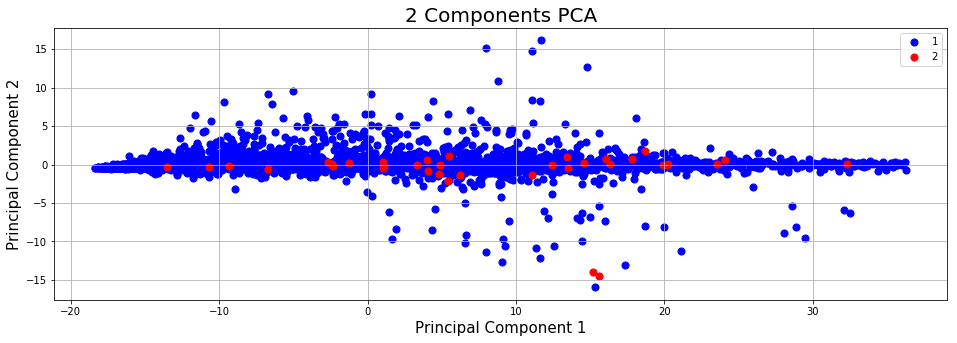

In [180]:
fig = plt.figure(figsize = (16,5))
ax = fig.add_subplot(1,1,1)

labels = [1,2]
colors = ['b', 'r']
for label, color in zip(labels,colors):
    indicesToKeep = df.iloc[:,0]==label
    ax.scatter(pc_norm[indicesToKeep, 0]
              , pc_norm[indicesToKeep, 1]
               ,label = label
              , c = color
              , s = 50)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Components PCA', fontsize = 20)
ax.legend(labels)
ax.grid()


In [181]:
var_ratio = pca.explained_variance_ratio_
var_ratio

array([0.85965039, 0.01038751])

In [182]:
var_percentage = (var_ratio[0] + var_ratio[1])*100
var_percentage

87.00379090865515

In [194]:
df_test = pd.read_csv("/Users/Nik Hadri Mahmod/Documents/Search of Exoplanets/exoTest.csv")
df_test.head(6)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
5,1,14.28,10.63,14.56,12.42,12.07,12.92,12.27,3.19,8.47,...,3.86,-4.06,-3.56,-1.13,-7.18,-4.78,-4.34,7.67,-0.33,-7.53


In [196]:
# store Flux 1-3192 in a matrix
x_test = df_test.iloc[:, 1:]
features_test = x_test.columns.values
# the matrix represents 5087 observations or candidates and 3197 different fluxes over time excluding the label feature
x_test = x_test.values
x_test.shape

(570, 3197)

In [186]:
X2 = np.array([[1, -1, 2],
             [2,  0, 0],
             [0,1, -1 ]])
#X = np.transpose(X)
X2 = X2.T
mms = preprocessing.MinMaxScaler()
print((mms.fit_transform(X2)).T)

[[0.66666667 0.         1.        ]
 [1.         0.         0.        ]
 [0.5        1.         0.        ]]


C:\Users\Nik Hadri Mahmod\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [197]:
test_data = pca.transform(x_test)

In [198]:
from sklearn.linear_model import LogisticRegression

In [199]:
logisticRegr = LogisticRegression(solver = 'lbfgs')